In [1]:
# Importing Necessary Libraries

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers

# Mounting Google Drive for Data

from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [2]:
# Setting Data Directories

train_dir = '/content/Drive/MyDrive/PokémonData/Train'
test_dir = '/content/Drive/MyDrive/PokémonData/Test'

# Getting the List of Categories

categories = sorted(os.listdir(train_dir))
num_classes = len(categories)
print('Number of Target Classes:', num_classes)
print(list(enumerate(categories)))

Number of Target Classes: 150
[(0, 'Abra'), (1, 'Aerodactyl'), (2, 'Alakazam'), (3, 'Alolan Sandslash'), (4, 'Arbok'), (5, 'Arcanine'), (6, 'Articuno'), (7, 'Beedrill'), (8, 'Bellsprout'), (9, 'Blastoise'), (10, 'Bulbasaur'), (11, 'Butterfree'), (12, 'Caterpie'), (13, 'Chansey'), (14, 'Charizard'), (15, 'Charmander'), (16, 'Charmeleon'), (17, 'Clefable'), (18, 'Clefairy'), (19, 'Cloyster'), (20, 'Cubone'), (21, 'Dewgong'), (22, 'Diglett'), (23, 'Ditto'), (24, 'Dodrio'), (25, 'Doduo'), (26, 'Dragonair'), (27, 'Dragonite'), (28, 'Dratini'), (29, 'Drowzee'), (30, 'Dugtrio'), (31, 'Eevee'), (32, 'Ekans'), (33, 'Electabuzz'), (34, 'Electrode'), (35, 'Exeggcute'), (36, 'Exeggutor'), (37, 'Farfetchd'), (38, 'Fearow'), (39, 'Flareon'), (40, 'Gastly'), (41, 'Gengar'), (42, 'Geodude'), (43, 'Gloom'), (44, 'Golbat'), (45, 'Goldeen'), (46, 'Golduck'), (47, 'Golem'), (48, 'Graveler'), (49, 'Grimer'), (50, 'Growlithe'), (51, 'Gyarados'), (52, 'Haunter'), (53, 'Hitmonchan'), (54, 'Hitmonlee'), (55, '

In [3]:
# Creating Training and Testing Data

training_data = []
testing_data = []

count = 0

def create_training_data():
  for category in categories:
    global count
    path = os.path.join(train_dir, category)
    num_class = categories.index(category)
    for img in sorted(os.listdir(path)):
      img_array = cv2.imread(os.path.join(path, img))
      count = count + 1
      print("Images Currently Processed: ", count)
      rbg_img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
      resized_array = cv2.resize(rbg_img_array, (64,64))
      training_data.append([resized_array, num_class])

def create_testing_data():
  for category in categories:
    global count
    path = os.path.join(test_dir, category)
    num_class = categories.index(category)
    for img in sorted(os.listdir(path)):
      img_array = cv2.imread(os.path.join(path, img))
      count = count + 1
      print("Images Currently Processed: ", count)
      rbg_img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
      resized_array = cv2.resize(rbg_img_array, (64,64))
      testing_data.append([resized_array, num_class])

create_training_data()
create_testing_data()

Streaming output truncated to the last 5000 lines.
Images Currently Processed:  1824
Images Currently Processed:  1825
Images Currently Processed:  1826
Images Currently Processed:  1827
Images Currently Processed:  1828
Images Currently Processed:  1829
Images Currently Processed:  1830
Images Currently Processed:  1831
Images Currently Processed:  1832
Images Currently Processed:  1833
Images Currently Processed:  1834
Images Currently Processed:  1835
Images Currently Processed:  1836
Images Currently Processed:  1837
Images Currently Processed:  1838
Images Currently Processed:  1839
Images Currently Processed:  1840
Images Currently Processed:  1841
Images Currently Processed:  1842
Images Currently Processed:  1843
Images Currently Processed:  1844
Images Currently Processed:  1845
Images Currently Processed:  1846
Images Currently Processed:  1847
Images Currently Processed:  1848
Images Currently Processed:  1849
Images Currently Processed:  1850
Images Currently Processed:  18

In [4]:
# Creating Training and Testing Numpy Arrays

x_train = []
y_train = []
x_test = []
y_test = []

for features, label in training_data:
  x_train.append(features)
  y_train.append(label)

for features, label in testing_data:
  x_test.append(features)
  y_test.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print("Training Data Shape: ", x_train.shape)
print("Testing Data Shape: ", x_test.shape)
print("Training Label Shape: ", y_train.shape)
print("Testing Label Shape: ", y_test.shape)

Training Data Shape:  (5023, 64, 64, 3)
Testing Data Shape:  (1800, 64, 64, 3)
Training Label Shape:  (5023,)
Testing Label Shape:  (1800,)


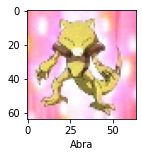

In [5]:
# Normalizing

x_train = x_train / 255
x_test = x_test / 255

# Plotting the first entry

def plot_sample(X, Y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(categories[Y[index]])

plot_sample(x_train, y_train, 0)

In [69]:
# Creating and Compiling CNN Model

cnn = models.Sequential([
                         # CNN Layers
                         layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', input_shape = (64,64,3)),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.BatchNormalization(),
                         layers.Conv2D(filters = 128, kernel_size = (3,3), strides = (2,2), activation = 'relu'),
                         layers.MaxPooling2D((2,2)),
                         # Dense Layers
                         layers.Flatten(),
                         layers.Dropout(0.2),
                         layers.Dense(1024, activation = 'relu'),
                         layers.Dense(512, activation = 'relu'),
                         layers.Dense(num_classes, activation = 'softmax')
])

cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
cnn.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 31, 31, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 29, 29, 128)       147584    
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 14, 14, 128)      512       
 hNormalization)                                                 
                                                     

In [70]:
# Fitting the model with Training Data

cnn.fit(x_train, y_train, epochs = 20)

Epoch 1/20
157/157 [==============================] - 103s 656ms/step - loss: 4.4542 - accuracy: 0.0591
Epoch 2/20
157/157 [==============================] - 100s 639ms/step - loss: 3.2382 - accuracy: 0.1945
Epoch 3/20
157/157 [==============================] - 100s 635ms/step - loss: 2.4586 - accuracy: 0.3578
Epoch 4/20
157/157 [==============================] - 99s 632ms/step - loss: 1.9106 - accuracy: 0.4744
Epoch 5/20
157/157 [==============================] - 100s 639ms/step - loss: 1.4651 - accuracy: 0.5859
Epoch 6/20
157/157 [==============================] - 99s 633ms/step - loss: 1.1387 - accuracy: 0.6651
Epoch 7/20
157/157 [==============================] - 100s 634ms/step - loss: 0.8371 - accuracy: 0.7559
Epoch 8/20
157/157 [==============================] - 99s 633ms/step - loss: 0.6218 - accuracy: 0.8035
Epoch 9/20
157/157 [==============================] - 100s 639ms/step - loss: 0.4517 - accuracy: 0.8620
Epoch 10/20
157/157 [==============================] - 100s 638ms/s

In [71]:
# Calculating Loss and Accuracy

(loss, accuracy) = cnn.evaluate(x_test, y_test)
print("Loss = ", loss)
print("Accuracy = ", accuracy)

57/57 [==============================] - 10s 173ms/step - loss: 2.9650 - accuracy: 0.5033
Loss =  2.9649946689605713
Accuracy =  0.503333330154419


In [72]:
# Making Predictions

predictions = cnn.predict(x_test)
predictions = [np.argmax(element) for element in predictions]
predictions = np.array(predictions)

print("Predictions of First 5 Test Inputs: ", predictions[:5])
print("Actual Classes of First 5 Test Inputs: ", y_test[:5])

Predictions of First 5 Test Inputs:  [ 29  56 119   0  60]
Actual Classes of First 5 Test Inputs:  [0 0 0 0 0]


In [74]:
# Saving the Model for Offline Usage

cnn.save("Pokémon_Model.h5")